# I. Table Data Handling (COVID-19)

In [ ]:
## Package 
%matplotlib inline
import matplotlib.pyplot as plt 
import pandas as pd 

Pandas 참고: https://pandas.pydata.org/docs/user_guide/index.html#user-guide

## 1. DataFrame

In [ ]:
df = pd.DataFrame({"A": [1, 2, 3, 4, 5, 6], "B": [2, 4, 6, 8, 10, 12], "C": ['a', 'b', 'c', 'd','e','f']})
df

## 2. Indexing

### Load COVID-19 Data

Dataset 출처: https://www.kaggle.com/sudalairajkumar/novel-corona-virus-2019-dataset

In [ ]:
## google drive mount 
from google.colab import drive
drive.mount('/content/gdrive')

## Directory
data_dir = '/content/gdrive/My Drive/Python_Programming/dataset/COVID-19/'
asset_dir = '/content/gdrive/My Drive/Python_Programming/assets/'

## Load excel 
covid19_data = pd.read_csv(data_dir + 'covid_19_data.csv')

covid19_data.head() 

In [ ]:
## Data Check
print("Index: ", covid19_data.index) 
print('\nColumns: ', covid19_data.columns) 
print('\nValues: ', covid19_data.values) 

### row

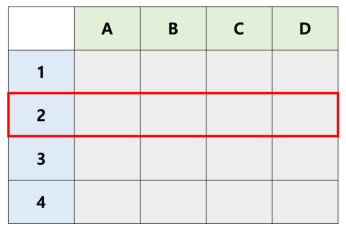

In [ ]:
row_pic = plt.imread(asset_dir + 'row.png')
plt.axis('off')
plt.imshow(row_pic)

In [ ]:
covid19_data[3:9]

### column

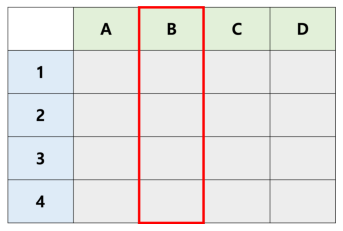

In [ ]:
column_pic = plt.imread(asset_dir + 'column.png')
plt.axis('off')
plt.imshow(column_pic)

In [ ]:
covid19_data['Confirmed']

In [ ]:
covid19_data[['Confirmed']]

In [ ]:
covid19_data.Confirmed  ## covid19_data.Province/State (x)

In [ ]:
covid19_data[['Province/State','Confirmed']]

### row & column : loc

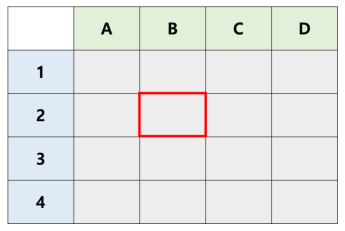

In [ ]:
value_pic = plt.imread(asset_dir + 'value.png')
plt.axis('off')
plt.imshow(value_pic)

In [ ]:
covid19_data.loc[100:105, ['Country/Region', 'Confirmed']]

In [ ]:
covid19_data.loc[:, ['Country/Region', 'Confirmed']]

### row & column : iloc

In [ ]:
covid19_data.iloc[100,5] 

In [ ]:
covid19_data.iloc[50:55, 3:5]

In [ ]:
covid19_data.iloc[[10, 50, 100], [2, 5]] # 개별 선택

## 3. Boolean Indexing

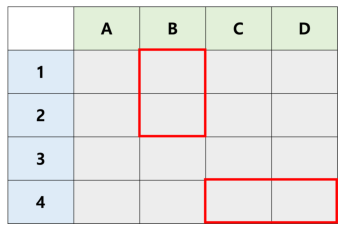

In [ ]:
condition_value_pic = plt.imread(asset_dir + 'condition_value.png')
plt.axis('off')
plt.imshow(condition_value_pic)

In [ ]:
covid19_data['Deaths'] > 50

In [ ]:
covid19_data[covid19_data['Deaths'] > 50]

In [ ]:
covid19_data[covid19_data['Country/Region'] == 'Mainland China']

In [ ]:
condition1 = covid19_data['Country/Region'] == 'Mainland China'
condition2 = covid19_data['Province/State'] == 'Fujian'
condition3 = covid19_data['Recovered'] < 100

covid19_data[condition1 & condition2 & condition3].head()

In [ ]:
covid19_data.loc[condition3, ['Confirmed', 'Deaths', 'Recovered']].head()

## 4. Operation

In [ ]:
## Sum
print(covid19_data[condition1 & condition2 & condition3].sum())

## Mean
print('\n', covid19_data[condition1 & condition2 & condition3].mean())

## Counting
print('\n', covid19_data[condition1 & condition2 & condition3].count())

## 5. Sorting

In [ ]:
covid19_data.sort_values(by='Confirmed', ascending=True) 

## 6. Delete

In [ ]:
covid19_data_copy = covid19_data.copy()
covid19_data_copy.head(5)

In [ ]:
## 특정 행 삭제: drop
covid19_data_copy.drop([3]).head()

In [ ]:
## 특정 2개 이상 행 삭제: drop
covid19_data_copy.drop([4,10]).head(10)

In [ ]:
## 특정 열 삭제하기: drop
covid19_data_copy.drop('ObservationDate', axis = 1).head()

In [ ]:
## 특정 2개 이상 열 삭제: drop
covid19_data_copy.drop(['ObservationDate', 'Deaths'], axis = 1).head()

In [ ]:
## 특정 열 삭제: del
del covid19_data_copy['Province/State']
covid19_data_copy.head(5)

## 7. Append

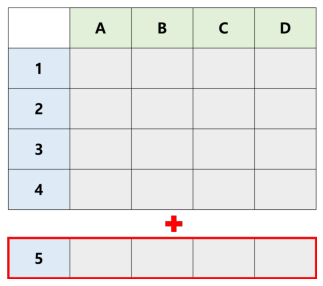

In [ ]:
condition_value_pic = plt.imread(asset_dir + 'append.png')
plt.axis('off')
plt.rcParams["figure.figsize"] = (10,5)
plt.imshow(condition_value_pic)

In [ ]:
## 맨 아래 행에 추가
covid19_data_copy = covid19_data.copy()
covid19_data_copy.append(covid19_data_copy.iloc[3])

## 8. Merge

조건: 합치는 두 Column 간에 공통 내용이 있어야 함

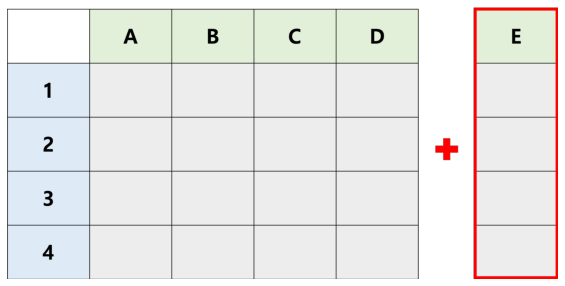

In [ ]:
condition_value_pic = plt.imread(asset_dir + 'merge_assign.png')
plt.axis('off')
plt.rcParams["figure.figsize"] = (10,5)
plt.imshow(condition_value_pic)

In [ ]:
confirmed = covid19_data_copy[["SNo", "Confirmed"]]
confirmed.head()

In [ ]:
covid19_data_confirmed_exclude = covid19_data_copy.drop(["Confirmed"], axis = 1)
covid19_data_confirmed_exclude.head()

In [ ]:
pd.merge(covid19_data_confirmed_exclude, confirmed, how='right')

## 9. Assign

In [ ]:
## 맨 오른쪽 열에 추가
DataFrame2list = covid19_data_copy["Province/State"].values.tolist() ## DataFrame to List
covid19_data_copy.assign(New = DataFrame2list)

## 10. Concatenation

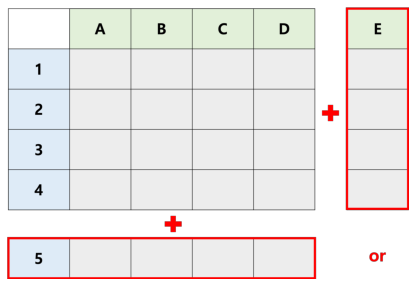

In [ ]:
condition_value_pic = plt.imread(asset_dir + 'concat.png')
plt.axis('off')
plt.rcParams["figure.figsize"] = (10,5)
plt.imshow(condition_value_pic)

조건: 합치는 두 Column 간에 공통 내용이 없어도 가능 (행 크기는 같아야 함)

In [ ]:
Deaths = covid19_data_copy[["Deaths"]]
covid19_data_death_exclude = covid19_data_copy.drop(["Deaths"], axis = 1)

In [ ]:
pd.concat([covid19_data_death_exclude, Deaths], axis=0) # axis 설정에 따라 row, column 설정

# II. Table "nan" Data Handling (COVID-19)

In [ ]:
""" nan example """
import numpy as np
from pandas import DataFrame

nan_example = DataFrame({'A': [0, 1, 2, np.nan],'B': [2, np.nan, 3, 4]})
print(nan_example)
print('\n', nan_example.isnull())

In [ ]:
covid19_data_copy = covid19_data.copy()
covid19_data_copy.head()

In [ ]:
## nan 확인
covid19_nan = covid19_data_copy["Province/State"].isnull()
covid19_nan[covid19_nan == True]

## 1. isnull

In [ ]:
## nan 갯수 확인
covid19_nan_count = covid19_data_copy["Province/State"].isnull().sum()
print(covid19_nan_count)

## 2. dropna

In [ ]:
# nan이 있는 모든 행 삭제
covid19_nan_drop = covid19_nan.dropna() 
print(covid19_nan_drop.isnull().sum())

In [ ]:
# nan이 있는 모든 열 삭제
covid19_nan_drop = covid19_nan.dropna(axis=1) ## -> error 발생 (모든 열 삭제)

## 3. fillna

In [ ]:
covid19_nan_value = covid19_data_copy["Province/State"].fillna(value=5)
covid19_nan_value[35:]

## 4. interpolate

In [ ]:
covid19_data_copy2 = covid19_data.copy()
covid19_nan_confirm = covid19_data_copy2["Confirmed"]

## Add noise
covid19_nan_confirm[5:8] = [np.nan, np.nan, np.nan]
covid19_nan_confirm[10:12] = [np.nan, np.nan]
print(covid19_nan_confirm[3:15])

## Inpolation
covid19_nan_interp = covid19_nan_confirm.interpolate()
print('\n', covid19_nan_interp[3:15])

# III. Tabel Data Visualization (COVID-19)

In [ ]:
country_region = covid19_data["Country/Region"]
print("*** Country/Region ***")
print(country_region)

## unique 
country_region_unique = covid19_data["Country/Region"].unique()
print("\n*** Unique Country/Region ***")
print(country_region_unique)
print('\nNumbers: ', len(country_region_unique))

## value_counts
country_region_count = covid19_data["Country/Region"].value_counts()
print("\n*** Counting Country/Region ***")
print(country_region_count)

## 1. Bar Chart

In [ ]:
## Plot Setting 
plt.title("Country/Region - Numbers", fontsize=15)
plt.xlabel("Country/Region", fontsize=15)
plt.ylabel("Numbers", fontsize=15)
plt.rcParams["figure.figsize"] = (15,10)

country_region_count.plot.bar()

In [ ]:
## Plot Setting 
plt.title("Country/Region - Numbers", fontsize=15)
plt.xlabel("Country/Region", fontsize=15)
plt.ylabel("Numbers", fontsize=15)
plt.rcParams["figure.figsize"] = (15,10)

## Plot (Top 10)
country_region_count[:10].plot.bar()

## 2. Pie Chart

In [ ]:
## Plot Setting 
plt.rcParams["figure.figsize"] = (50,50)
plt.axis('equal')

## Plot
country_region_count.plot.pie(fontsize=50)

In [ ]:
## Plot Setting 
plt.rcParams["figure.figsize"] = (50,50)
plt.axis('equal')

## Plot (Top 10)
country_region_count[:10].plot.pie(fontsize=50)